**Report: Understanding the relation between Munich's Population Duration of Residence to the Parking Infrastructure in the city**

**Contents:**

1. Introduction
2. Methods & Data Sources
3. Data Loading and Inspection
4. Results
5. Conclusion

**1. Introduction**

Positioned as the capital of Bavaria,Munich stands out as one of Germany's fastest-growing cities, celebrated for its economic prosperity and leadership in the banking and financial sector. Consistently ranking among the world's best in terms of economic vitality, employment opportunities, and living standards, Munich attracts a continuous stream of residents.In this report, we aim to explore the relationship between Munich's vibrant parking infrastructure, essential for daily life, and the duration of residence for its diverse population.

**2. Methods & Data Sources**

**Data-Source 1: Population – Duration of residence Munich**

Metadata URL: https://data.europa.eu/data/datasets/https-piveau-io-set-data-https-opendata-muenchen-de-dataset-indikatorenatlas-bevoelkerung-wohndauer-muenchen-83r65mct?locale=en

Data URL: https://data.europa.eu/data/visualisation/?file=https%3A%2F%2Fopendata.muenchen.de%2Fdataset%2F8a2e197b-69ff-4456-aff1-48763cb5dea3%2Fresource%2F773a81c6-1467-4c4a-adde-329776f4b44e%2Fdownload%2Findikat_bevoelkerung_wohndauer_muenchen_240723.csv

Data Type: CSV

This dataset contains the information of average length of residence in Munich of the main resident population of the corresponding category in years.


**Data-Source 2:Munich parking garages**

Metadata URL: https://opendata.muenchen.de/dataset/parkhaeuser-munchen

Data URL: https://opendata.muenchen.de/dataset/parkhaeuser-munchen/resource/e0e0e4e1-1b25-4c04-a0ea-cf9cc8335c57

Data Type: CSV

This data set contains information about parking garages in the Munich city area.

Having carried out essential data transformations on both datasets, our focus now turns to independent analysis. By exploring each dataset separately, we aim to find insights that may contribute to addressing our central question

**3. Data Loading & Inspection**

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the Population dataset
population_df = pd.read_csv('population.csv', sep=',')
population_df.head(5)

,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert.1,Basiswert.2,Basiswert.3,Basiswert.4,Basiswert.5,Name.Basiswert.1,Name.Basiswert.2,Name.Basiswert.3,Name.Basiswert.4,Name.Basiswert.5
0,Wohndauer München,deutsch,2022,Stadt München,22.7,25208908,1110006,NaN,NaN,NaN,Summe (Wohndauer in München) (deutsch),Hauptwohnsitzbevölkerung (deutsch),NaN,NaN,NaN
1,Wohndauer München,deutsch,2022,01 Altstadt - Lehel,18.9,291259,15446,NaN,NaN,NaN,Summe (Wohndauer in München) (deutsch),Hauptwohnsitzbevölkerung (deutsch),NaN,NaN,NaN
2,Wohndauer München,deutsch,2022,02 Ludwigsvorstadt - Isarvorstadt,17.4,638143,36716,NaN,NaN,NaN,Summe (Wohndauer in München) (deutsch),Hauptwohnsitzbevölkerung (deutsch),NaN,NaN,NaN
3,Wohndauer München,deutsch,2022,03 Maxvorstadt,17.0,647450,38098,NaN,NaN,NaN,Summe (Wohndauer in München) (deutsch),Hauptwohnsitzbevölkerung (deutsch),NaN,NaN,NaN
4,Wohndauer München,deutsch,2022,04 Schwabing - West,21.0,1091918,52056,NaN,NaN,NaN,Summe (Wohndauer in München) (deutsch),Hauptwohnsitzbevölkerung (deutsch),NaN,NaN,NaN


In [4]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Indikator         1794 non-null   object 
 1   Ausprägung        1794 non-null   object 
 2   Jahr              1794 non-null   int64  
 3   Raumbezug         1794 non-null   object 
 4   Indikatorwert     1794 non-null   float64
 5   Basiswert.1       1794 non-null   int64  
 6   Basiswert.2       1794 non-null   int64  
 7   Basiswert.3       0 non-null      float64
 8   Basiswert.4       0 non-null      float64
 9   Basiswert.5       0 non-null      float64
 10  Name.Basiswert.1  1794 non-null   object 
 11  Name.Basiswert.2  1794 non-null   object 
 12  Name.Basiswert.3  0 non-null      float64
 13  Name.Basiswert.4  0 non-null      float64
 14  Name.Basiswert.5  0 non-null      float64
dtypes: float64(7), int64(3), object(5)
memory usage: 210.4+ KB


In [5]:
# Since our dataset contains the data from 2000 to 2022, we trim down our data for years after 2020, i.e., 2020,2021 and 2022
#Sorts the dataset based on year in a descending order
population_df = population_df.sort_values(by='Jahr', ascending=False, ignore_index= True)

# storing data from 2020 onwards
population_df = population_df[population_df['Jahr'] >= 2020]

#removing unwanted columns
columns_to_keep_indices = [0, 1, 2, 3, 4, 5, 6]
population_df = population_df.iloc[:, columns_to_keep_indices]

population_df.head()


,Indikator,Ausprägung,Jahr,Raumbezug,Indikatorwert,Basiswert.1,Basiswert.2
0,Wohndauer München,deutsch,2022,Stadt München,22.7,25208908,1110006
1,Wohndauer München,nichtdeutsch,2022,25 Laim,11.8,206643,17529
2,Wohndauer München,insgesamt,2022,02 Ludwigsvorstadt - Isarvorstadt,15.5,786984,50914
3,Wohndauer München,insgesamt,2022,03 Maxvorstadt,14.9,778073,52269
4,Wohndauer München,insgesamt,2022,04 Schwabing - West,18.6,1273227,68601


In [8]:
#renaming the columns
population_df=population_df.rename(columns={"Indikator":"Place","Ausprägung":"Category_of_Residents","Jahr":"Year",
                       "Raumbezug":"Place","Indikatorwert":"Avg_durofres",
                       "Basiswert.1":"Dur_ofresi",
                       "Basiswert.2":"Population"})

In [12]:
#There are three category of Residents in the dataset - 1. German Citizens, 2- Immigrants, 3- All
#We rename them from German to English for our understanding
population_df['Category_of_Residents'] = population_df['Category_of_Residents'].replace({
    'deutsch': 'German Citizen',
    'nichtdeutsch': 'Immigrant',
    'insgesamt': 'People'
})

In [14]:
#loading the parking_garages data
parking_df = pd.read_csv('parking_garages.csv', sep=',')
parking_df.head()

,places__id,places__title,places__city,places__street,places__streetNumber,places__location__lat,places__location__lng,places__media__listPictureUrl,places__urlInPortal,places__ratingAverage
0,1224104,Tiefgarage P&R Fürstenried,München,Neurieder Str.,40,48.087114,11.484737,NaN,NaN,0.0
1,1253403,Parkhaus Audi Dome,München,Siegenburger Str.,65,48.127385,11.522766,NaN,NaN,0.0
2,1253402,Parkhaus Laimer Platz,München,Fürstenrieder Str.,62,48.135910,11.502600,NaN,NaN,0.0
3,1224105,Tiefgarage P&R Heimeranplatz,München,Garmischer Str.,19,48.131401,11.530912,NaN,NaN,0.0
4,1224110,West 4,München,Elsenheimerstr.,57,48.137440,11.523060,NaN,NaN,0.0


In [15]:
#Data transformation
columns_to_remove = [5, 6, 7, 8]
parking_df.drop(columns=parking_df.columns[columns_to_remove], inplace=True)

**4: Results**

**We, first analyse the Population data of Munich from the Year 2020, 2021 and 2022.**

**Question1: How has the Population Composition changed over the years among the Citizens and Immigrants?**

To address this question, I have used pie chart to show the population composition for each year

F:\Softwareinstallations\Annaconda\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


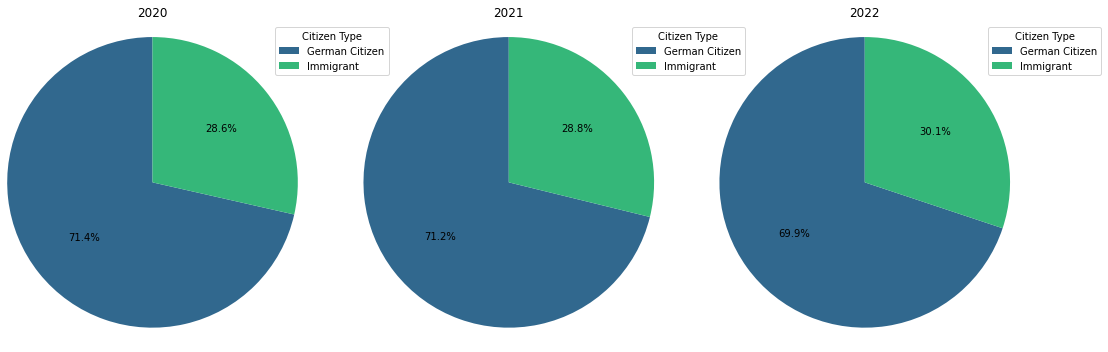

In [17]:
data = population_df[['Year', 'Category_of_Residents', 'Population']]

citizen_names = {'German Citizen': 'German Citizen', 'Immigrant': 'Immigrant'}
data.loc[:, 'Citizen_Name'] = data['Category_of_Residents'].map(citizen_names)
# Selecting the two categories German Citizen and Immigrant
selected_categories = ['German Citizen', 'Immigrant']
filtered_data = data[data['Category_of_Residents'].isin(selected_categories)]
grouped_data = filtered_data.groupby(['Year', 'Category_of_Residents', 'Citizen_Name'])['Population'].sum().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plotting pie charts for each year
colors = sns.color_palette('viridis', len(selected_categories))
for i, year in enumerate(grouped_data['Year'].unique()):
    subset_data = grouped_data[grouped_data['Year'] == year]
    axes[i].pie(subset_data['Population'], labels=subset_data['Citizen_Name'], autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=None)
    axes[i].set_title(f'{year}')
    axes[i].axis('equal')  
    axes[i].legend(title='Citizen Type', labels=subset_data['Citizen_Name'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the above, we can Infer that Munich being the fastet growing cities in Germany, is attracting more immigrants to find opportunities

**Question 2: What are trends of Average duration of residence of all the districts in Munich over the years?**

I have used Heatmaps to analyse the trend

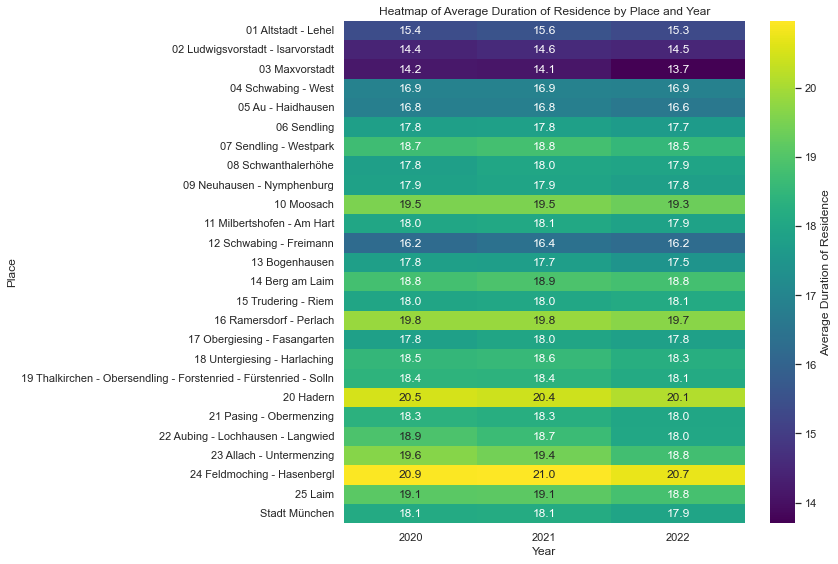

In [146]:
data = population_df[['Year', 'Place', 'Avg_durofres']]
data = data.sort_values(by=['Year', 'Place'])
heatmap_data = data.pivot_table(index='Place', columns='Year', values='Avg_durofres', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", cbar_kws={'label': 'Average Duration of Residence'})
plt.title('Heatmap of Average Duration of Residence by Place and Year')
plt.xlabel('Year')
plt.ylabel('Place')
plt.tight_layout()
plt.show()

From the above heatmap you can see that the major districts such as district 1 Alstadt - Lehel, District 2- Ludwigsvorstadt and District 3- Maxvorstadt which are the located at the centre of Munich seem to have the least stay of duration among people residing. We can infer that people staying in other districts tend to stay more than the people located in the centre 

**Now, Let us analyse the Parking Garages Data**

**Question 1: Finding the number of Parking Spaces per street?**

I have used barplot, to show the number of parking spaces per street


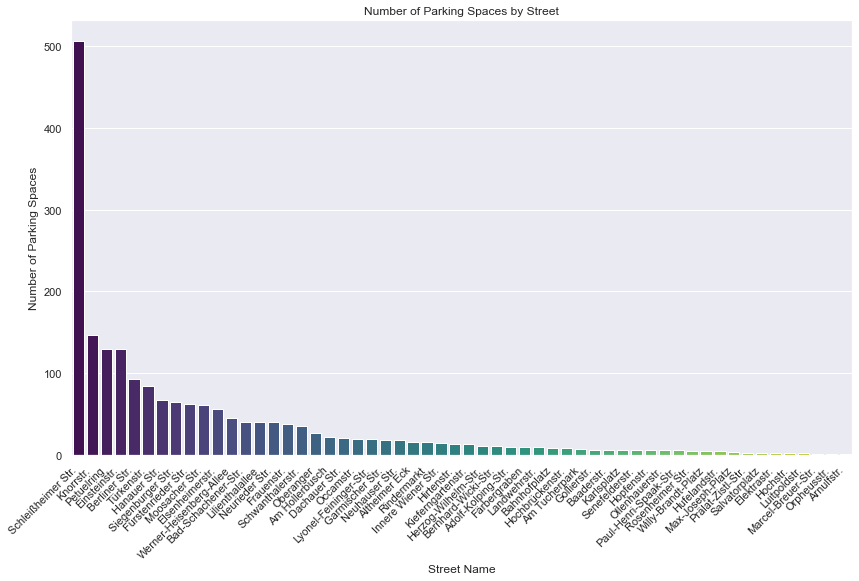

In [135]:
street_space_counts = parking_df.groupby('places__street')['places__streetNumber'].sum().reset_index()
street_space_counts = street_space_counts.sort_values(by='places__streetNumber', ascending=False)
plt.figure(figsize=(14, 8))
sns.barplot(x='places__street', y='places__streetNumber', data=street_space_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Number of Parking Spaces by Street')
plt.xlabel('Street Name')
plt.ylabel('Number of Parking Spaces')
plt.show()

**Question2: How are the rating averages varying as per the places?**

I have used, barplot to visualise the rating averages of parking places

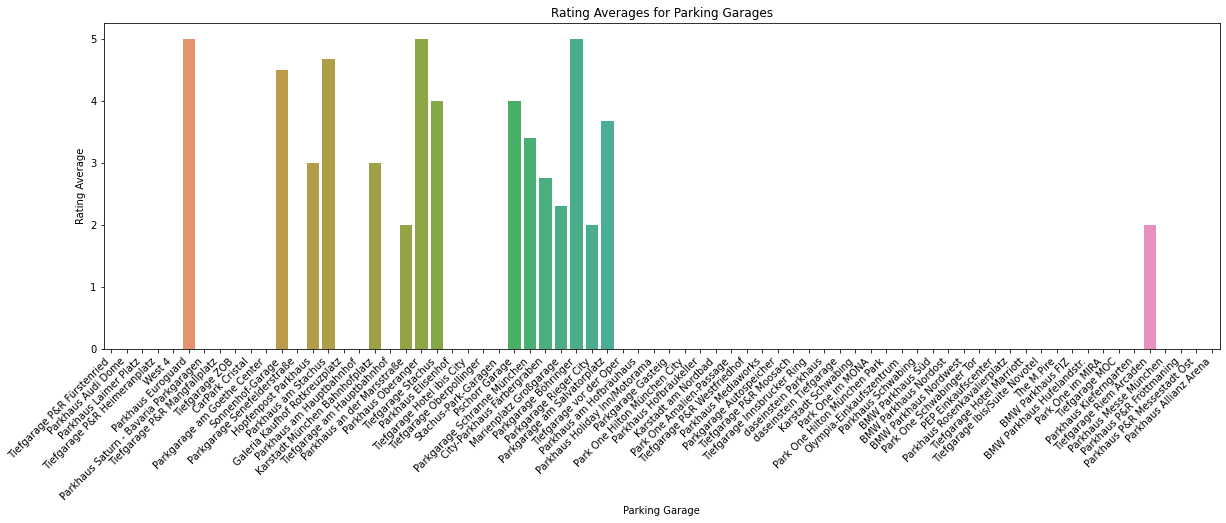

In [22]:
plt.figure(figsize=(20, 6))
sns.barplot(x='places__title', y='places__ratingAverage', data=parking_df)
plt.xticks(rotation=45, ha='right')
plt.title('Rating Averages for Parking Garages')
plt.xlabel('Parking Garage')
plt.ylabel('Rating Average')
plt.show()

**5. Conclusion**

The Population dataset contains the information regarding the population composition and their average duration of residence over the years in all the ditricts of Munich. The Munich parking garages dataset gives us the information of the parking spaces located in Munich and the spaces they have. 

Even though, the two datasets are in connection with Munich, a direct correlation could not be established as there are no common columns and values on how the tables can be merged. Hence, I have inferred using my knowledge of travelling and being in Munich on how parking garage Infrastructe has affected the average duration in Munich.


**Findings:**

Using the Munich Population dataset, we inferred that people living in other districts of Munich other than the one in central Munich tend to stay longer. Among the 25 districts in Munich, people tend to stay longer in **District 24- Feldmoching-Hasenbergl**. Now, using the parking garages data, we came to know that the street Schleißheimer Str has the highest number of parking spaces. Now as per the geographical location the Schleißheimer Str is part of the **District 24- Feldmoching-Hasenbergl**. Hence, we can Infer that since there are ample amount of parking spaces available in District 24- Feldmoching-Hasenbergl, people's average duration of residence is much better than the other parts of Munich.

Since, the rating averages of parking garages in and around Munich are not satisfactory, it has drastically impacted and forced people to migrate out of 